# Adoption of cats from shelters

### Objective 
To build a classification model to predict whether a cat would be adopted or not within 4 weeks of their intake into a shelter give certain features of the cat.

### Data Cleaning and EDA

The following goals are achieved in this notebook
1.  Combined data from 2 different files (file1: details about the intake of the animals into the shelter, file2: details about their outcome) into one data source. You have to be a little careful as some animals have been adopted and returned to the shelter on multiple occassions.

1. Austin shelters takes in a number of kinds of animals like cats, dogs, livestock and birds. Each type of animal has a unique set of charateristics like breed, color, average age etc. Building a generalised model for all thses kinds of animals wouldn't be right. Hence, this project only focuses on the 'Cats' that came into the shelter.

1. Cats that arrive at the shelter can have outcomes like 'Adoption', 'Return to Owner', 'Euthanasia', 'Transfer', 'Died', 'Disposal', 'Rto-Adopt', 'Relocate', 'Missing'. This project just focuses on the cats that were adopted or Rto-adopt.

1. The average number of days spent by a cat in the shelter is 28. Hence the problem is formulated to predict whether a cat would be adopted or not within 4 weeks of their intake.

1. These are the variables used in this classification task.
    * Named (whether the cat had a name at the time of intake)
    * Age
    * Color of Fur {white, black, brown, blue, orange, mixed colors}
    * Patterns on Fur {Tabby, Calico, Tortie, Point, Torbie, Smoke}
    * Breed {Domestic Longhair, Domestic Shorthair, Domestic Medium Hair, Siamese}
    * Intake Type {Stray, Owner Surrender}
    * Intake Condition {Normal, Sick, Injured, Nursing, Pregnant, Other}
    * Gender {Male, Female}
    * Neutered {Yes, No}

1. Final data frame obtained after running this notebook contains
    * 37 features and 1 target value.
    * Age – only numeric attribute, scaled using standard scaler
    * Dummies created for the categorical variables

In [392]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
from sklearn.preprocessing import StandardScaler
pd.options.mode.chained_assignment = None
%matplotlib inline

Data collected from https://data.austintexas.gov/  

In [393]:
intake = pd.read_csv('Data files/Austin_Animal_Center_Intakes.csv')
outcome = pd.read_csv('Data files/Austin_Animal_Center_Outcomes.csv')

In [394]:
intake.head()

,Animal ID,Name,DateTime,MonthYear,Found Location,Intake Type,Intake Condition,Animal Type,Sex upon Intake,Age upon Intake,Breed,Color
0,A748291,*Madison,05/01/2017 02:26:00 PM,05/01/2017 02:26:00 PM,S Pleasant Valley Rd And E Riverside Dr in Aus...,Stray,Normal,Dog,Intact Female,10 months,Pit Bull Mix,Black
1,A750529,NaN,05/28/2017 01:22:00 PM,05/28/2017 01:22:00 PM,8312 North Ih 35 in Austin (TX),Stray,Normal,Dog,Intact Female,5 months,Miniature Schnauzer Mix,White/Cream
2,A730601,NaN,07/07/2016 12:11:00 PM,07/07/2016 12:11:00 PM,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,Intact Male,7 months,Domestic Shorthair Mix,Blue Tabby
3,A748238,NaN,05/01/2017 10:53:00 AM,05/01/2017 10:53:00 AM,Airport Blvd And Oak Springs Dr in Austin (TX),Stray,Normal,Dog,Intact Male,3 years,Bichon Frise Mix,White
4,A683644,*Zoey,07/13/2014 11:02:00 AM,07/13/2014 11:02:00 AM,Austin (TX),Owner Surrender,Nursing,Dog,Intact Female,4 weeks,Border Collie Mix,Brown/White


In [395]:
intake.shape

(79753, 12)

In [396]:
intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79753 entries, 0 to 79752
Data columns (total 12 columns):
Animal ID           79753 non-null object
Name                55317 non-null object
DateTime            79753 non-null object
MonthYear           79753 non-null object
Found Location      79753 non-null object
Intake Type         79753 non-null object
Intake Condition    79753 non-null object
Animal Type         79753 non-null object
Sex upon Intake     79752 non-null object
Age upon Intake     79753 non-null object
Breed               79753 non-null object
Color               79753 non-null object
dtypes: object(12)
memory usage: 7.3+ MB


In [397]:
outcome.head()

,Animal ID,Name,DateTime,MonthYear,Date of Birth,Outcome Type,Outcome Subtype,Animal Type,Sex upon Outcome,Age upon Outcome,Breed,Color
0,A741715,*Pebbles,01/11/2017 06:17:00 PM,01/11/2017 06:17:00 PM,03/07/2016,Adoption,NaN,Cat,Spayed Female,10 months,Domestic Shorthair Mix,Calico
1,A658751,Benji,11/13/2016 01:38:00 PM,11/13/2016 01:38:00 PM,07/14/2011,Return to Owner,NaN,Dog,Neutered Male,5 years,Border Terrier Mix,Tan
2,A721285,NaN,02/24/2016 02:42:00 PM,02/24/2016 02:42:00 PM,02/24/2014,Euthanasia,Suffering,Other,Unknown,2 years,Raccoon Mix,Black/Gray
3,A697000,Boone,02/16/2015 01:24:00 PM,02/16/2015 01:24:00 PM,02/16/2009,Return to Owner,NaN,Dog,Neutered Male,6 years,English Springer Spaniel Mix,Liver/White
4,A697055,Megatron,02/17/2015 03:06:00 PM,02/17/2015 03:06:00 PM,02/17/2012,Adoption,NaN,Dog,Spayed Female,3 years,Dachshund/Chihuahua Shorthair,Red


In [398]:
outcome.shape

(80068, 12)

In [399]:
outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80068 entries, 0 to 80067
Data columns (total 12 columns):
Animal ID           80068 non-null object
Name                55711 non-null object
DateTime            80068 non-null object
MonthYear           80068 non-null object
Date of Birth       80068 non-null object
Outcome Type        80056 non-null object
Outcome Subtype     36635 non-null object
Animal Type         80068 non-null object
Sex upon Outcome    80066 non-null object
Age upon Outcome    80061 non-null object
Breed               80068 non-null object
Color               80068 non-null object
dtypes: object(12)
memory usage: 7.3+ MB


In [400]:
def to_pickle(filename,objname):
    with open(filename, 'wb') as f:
        pickle.dump(objname, f)

In [401]:
def from_pickle(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [402]:
intake['IntakeDate'] = pd.to_datetime(intake['DateTime'],format ='%m/%d/%Y %I:%M:%S %p' )
intake = intake.drop(['DateTime','MonthYear','Found Location'],axis=1)

In [403]:
outcome['OutcomeDate'] = pd.to_datetime(outcome['DateTime'],format ='%m/%d/%Y %I:%M:%S %p' )
outcome['Date of Birth'] = pd.to_datetime(outcome['Date of Birth'],format ='%m/%d/%Y' )
outcome = outcome.drop(['DateTime','MonthYear','Name','Breed','Color'],axis=1)

In [404]:
## filtering out the cats
cats_in = intake.loc[intake['Animal Type']=='Cat']
cats_in.shape

(29552, 10)

In [405]:
## no.of unique cats taken in by the shelter 
len(cats_in['Animal ID'].unique())

28319

In [406]:
## filtering out the cats
cats_out = outcome.loc[outcome['Animal Type']=='Cat']
cats_out.shape

(29866, 8)

In [407]:
## no.of unique cats given out by the shelter 
len(cats_out['Animal ID'].unique())

28617

In [408]:
## certain cats have been adopted and given back to the shelter on multiple occassions
## the code snippet below tries to match the intake and outcome of each animal in chrological order

cats_out_sorted = cats_out.sort_values(by=["Animal ID","OutcomeDate"], ascending=[False, False])
cats_in_sorted = cats_in.sort_values(by=["Animal ID","IntakeDate"], ascending=[False, False])

cats_in_sorted['Count'] = cats_in_sorted.groupby(['Animal ID']).cumcount()+1
cats_out_sorted['Count'] = cats_out_sorted.groupby(['Animal ID']).cumcount()+1

cats_merge = cats_in_sorted.merge(cats_out_sorted, how='inner', on=['Animal ID','Count'])
pd.concat(g for _, g in cats_merge.groupby("Animal ID") if len(g) > 1).head(10);

In [409]:
cats_merge.shape

(29400, 18)

In [410]:
cats_merge.head(5)

,Animal ID,Name,Intake Type,Intake Condition,Animal Type_x,Sex upon Intake,Age upon Intake,Breed,Color,IntakeDate,Count,Date of Birth,Outcome Type,Outcome Subtype,Animal Type_y,Sex upon Outcome,Age upon Outcome,OutcomeDate
0,A768439,NaN,Stray,Normal,Cat,Intact Male,5 months,Domestic Shorthair Mix,Orange Tabby/White,2018-03-19 14:53:00,1,2017-09-19,Euthanasia,Suffering,Cat,Intact Male,5 months,2018-03-20 09:01:00
1,A768409,NaN,Stray,Injured,Cat,Unknown,1 year,Domestic Shorthair Mix,White,2018-03-19 08:05:00,1,2017-03-19,Euthanasia,Rabies Risk,Cat,Unknown,NaN,2018-03-19 10:44:00
2,A768343,NaN,Stray,Nursing,Cat,Intact Female,2 days,Domestic Shorthair Mix,White,2018-03-17 13:12:00,1,2018-03-15,Transfer,Partner,Cat,Intact Female,2 days,2018-03-17 14:50:00
3,A768342,NaN,Stray,Nursing,Cat,Intact Female,2 days,Domestic Shorthair Mix,Black,2018-03-17 13:12:00,1,2018-03-15,Transfer,Partner,Cat,Intact Female,2 days,2018-03-17 14:50:00
4,A768341,NaN,Stray,Nursing,Cat,Intact Male,2 days,Domestic Shorthair Mix,Black/White,2018-03-17 13:12:00,1,2018-03-15,Transfer,Partner,Cat,Intact Male,2 days,2018-03-17 14:49:00


In [411]:
cats_merge = cats_merge.drop(['Animal Type_x','Animal Type_y','Animal ID','Count','Outcome Subtype'],axis=1)

## cats that had a name at the time of intake at the shelter are given a value of '1'
## cats that didn't have a name at the time of intake at the shelter are given a value of '0'
cats_merge.loc[cats_merge['Name'].notnull(),'Name']=1
cats_merge.loc[cats_merge['Name'].isnull(),'Name']=0

cats_merge['IntakeAge'] = (cats_merge['IntakeDate'] - cats_merge['Date of Birth']).dt.days
cats_merge['OutcomeAge'] = (cats_merge['OutcomeDate'] - cats_merge['Date of Birth']).dt.days
cats_merge['DaysInShelter']= cats_merge['OutcomeAge'] - cats_merge['IntakeAge']

cats_merge['adoption_month'] = cats_merge['OutcomeDate'].dt.month

cats_merge = cats_merge.drop(['IntakeDate','Date of Birth','OutcomeDate','Age upon Intake', 'Age upon Outcome'],axis=1)

cats_merge.head(5)

,Name,Intake Type,Intake Condition,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,IntakeAge,OutcomeAge,DaysInShelter,adoption_month
0,0,Stray,Normal,Intact Male,Domestic Shorthair Mix,Orange Tabby/White,Euthanasia,Intact Male,181,182,1,3
1,0,Stray,Injured,Unknown,Domestic Shorthair Mix,White,Euthanasia,Unknown,365,365,0,3
2,0,Stray,Nursing,Intact Female,Domestic Shorthair Mix,White,Transfer,Intact Female,2,2,0,3
3,0,Stray,Nursing,Intact Female,Domestic Shorthair Mix,Black,Transfer,Intact Female,2,2,0,3
4,0,Stray,Nursing,Intact Male,Domestic Shorthair Mix,Black/White,Transfer,Intact Male,2,2,0,3


In [412]:
## unique values the different variables can take
print adopted_cats['Name'].unique()
print adopted_cats['Intake Type'].unique()
print adopted_cats['Intake Condition'].unique()
print adopted_cats['Sex upon Intake'].unique()
print adopted_cats['Sex upon Outcome'].unique()
print len(adopted_cats['Breed'].unique())
print adopted_cats['Breed'].unique()
print len(adopted_cats['Color'].unique())
print adopted_cats['Color'].unique()
print adopted_cats['Outcome Type'].unique()

[1 0]
['Owner Surrender' 'Stray' 'Public Assist' 'Euthanasia Request']
['Normal' 'Injured' 'Sick' 'Feral' 'Nursing' 'Other' 'Pregnant' 'Aged']
['Spayed Female' 'Neutered Male' 'Intact Male' 'Intact Female' 'Unknown']
['Spayed Female' 'Neutered Male' 'Intact Male' 'Intact Female' 'Unknown']
67
['Domestic Shorthair Mix' 'Domestic Medium Hair Mix' 'Siamese'
 'Scottish Fold/Domestic Shorthair' 'Domestic Shorthair'
 'Domestic Medium Hair' 'Snowshoe Mix' 'Domestic Longhair Mix'
 'Himalayan Mix' 'Bengal Mix' 'American Curl Shorthair/Siamese'
 'Maine Coon Mix' 'American Curl Shorthair'
 'Japanese Bobtail/American Curl Shorthair' 'Siamese Mix'
 'American Shorthair Mix' 'Domestic Medium Hair/Manx' 'Persian Mix'
 'Domestic Shorthair/Domestic Shorthair' 'Persian'
 'American Curl Shorthair Mix' 'Domestic Longhair' 'Russian Blue Mix'
 'Japanese Bobtail Mix' 'Norwegian Forest Cat Mix'
 'Domestic Shorthair/Maine Coon' 'Bengal/Domestic Shorthair' 'Manx Mix'
 'Cornish Rex Mix' 'Ragdoll Mix' 'Oriental Sh

In [413]:
## I am just interested in the cats that were adopted
adopted_cats = cats_merge.loc[cats_merge['Outcome Type']=='Adoption']

In [414]:
to_pickle('Data files/cats_merge.p',cats_merge)
to_pickle('Data files/adopted_cats.p',adopted_cats)

In [415]:
## simplify the values for breed and color

In [416]:
adopted_cats.loc[adopted_cats['Color']=='Blue/Blue','Color']='Blue'
adopted_cats.loc[adopted_cats['Color']=='Blue/Tortie','Color'] = 'Blue Tortie'
adopted_cats.loc[adopted_cats['Color']=='Blue Cream','Color'] = 'Blue/Cream'
adopted_cats.loc[adopted_cats['Color']=='Tortie/Blue Tabby', 'Color'] = 'Tortie Blue Tabby' 

In [417]:
adopted_cats.loc[adopted_cats['Color']=='Black/Black','Color'] = 'Black'
adopted_cats.loc[adopted_cats['Color']=='Tortie/Black','Color'] = 'Tortie Black'
adopted_cats.loc[adopted_cats['Color']=='Calico/Black','Color'] = 'Calico Black'
adopted_cats.loc[adopted_cats['Color']=='Tortie/Black Smoke','Color'] = 'Tortie Black Smoke'

In [418]:
adopted_cats.loc[adopted_cats['Color']=='Brown Tabby/Tortie','Color'] = 'Brown Tabby Tortie'
adopted_cats.loc[adopted_cats['Color']=='Calico/Brown','Color'] = 'Calico Brown'
adopted_cats.loc[adopted_cats['Color']=='Brown Tabby/Brown','Color'] = 'Brown Tabby'
adopted_cats.loc[adopted_cats['Color']=='Calico/Brown Tabby','Color'] = 'Calico Brown Tabby'
adopted_cats.loc[adopted_cats['Color']=='Agouti/Brown Tabby','Color'] = 'Brown Tabby'

In [419]:
adopted_cats.loc[adopted_cats['Color']=='Chocolate','Color'] = 'Brown'
adopted_cats.loc[adopted_cats['Color']=='Chocolate Point','Color'] = 'Brown Point'
adopted_cats.loc[adopted_cats['Color']=='Chocolate/White','Color'] = 'Brown/White'
adopted_cats.loc[adopted_cats['Color']=='Chocolate Point/White','Color'] = 'Brown Point/White'

In [420]:
adopted_cats.loc[adopted_cats['Color']=='Orange Tabby/Orange','Color'] = 'Orange Tabby'
adopted_cats.loc[adopted_cats['Color']=='Calico/Orange Tabby','Color'] = 'Calico Orange Tabby' 
adopted_cats.loc[adopted_cats['Color']=='Tortie/Orange','Color'] = 'Tortie Orange'

In [421]:
adopted_cats.loc[adopted_cats['Color']=='Gray/Tortie','Color'] = 'Gray Tortie'

In [422]:
adopted_cats.loc[adopted_cats['Color']=='Cream Tabby/Cream Tabby','Color'] = 'Cream Tabby' 

In [423]:
adopted_cats.loc[adopted_cats['Color']=='Tortie/White','Color'] = 'White Tortie'
adopted_cats.loc[adopted_cats['Color']=='White/White','Color'] = 'White'
adopted_cats.loc[adopted_cats['Color']=='Calico/White','Color'] = 'White Calico'
adopted_cats.loc[adopted_cats['Color']=='White/Calico','Color'] = 'White Calico'
adopted_cats.loc[adopted_cats['Color']=='Calico/Calico','Color'] = 'Calico'

In [424]:
adopted_cats.loc[adopted_cats.Color.str.contains('Silver'),'Color'] = adopted_cats.Color.str.replace('Silver','Gray')

In [425]:
## creating dummy variables for the color and breed variable

In [426]:
adopted_cats['Smoke'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Smoke'),'Smoke'] = 1 
adopted_cats['white'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('White'),'white'] = 1 
adopted_cats['black'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Black'),'black'] = 1 
adopted_cats['blue'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Blue'),'blue'] = 1 
adopted_cats['brown'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Brown'),'brown'] = 1 
adopted_cats['orange'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Orange'),'orange'] = 1 
adopted_cats['cream'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Cream'),'cream'] = 1 
adopted_cats['gray'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Gray'),'gray'] = 1 
adopted_cats['lilac'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Lilac'),'lilac'] = 1 
adopted_cats['tan'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Tan'),'tan'] = 1 
adopted_cats['mix_color'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('/'),'mix_color'] = 1 

In [427]:
adopted_cats['Tabby'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Tabby'),'Tabby'] = 1 
adopted_cats['Calico'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Calico'),'Calico'] = 1 
adopted_cats['Tortie'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Tortie'),'Tortie'] = 1 
adopted_cats['Point'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Point'),'Point'] = 1 
adopted_cats['Torbie'] = 0
adopted_cats.loc[adopted_cats.Color.str.contains('Torbie'),'Torbie'] = 1 

In [428]:
adopted_cats.loc[((adopted_cats['Tabby']==1) & (adopted_cats['Tortie']==1)),'Torbie']=1 

In [429]:
adopted_cats.loc[adopted_cats.Color.str.contains('Lynx Point'),('white')] = 1
adopted_cats.loc[adopted_cats.Color.str.contains('Lynx Point'),('gray')] = 1
adopted_cats.loc[adopted_cats.Color.str.contains('Seal Point'),('white')] = 1
adopted_cats.loc[adopted_cats.Color.str.contains('Lynx Point'),('black')] = 1

In [430]:
adopted_cats.loc[adopted_cats['Point']==1,'mix_color'] = 1

In [431]:
adopted_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12605 entries, 18 to 29388
Data columns (total 28 columns):
Name                12605 non-null int64
Intake Type         12605 non-null object
Intake Condition    12605 non-null object
Sex upon Intake     12605 non-null object
Breed               12605 non-null object
Color               12605 non-null object
Outcome Type        12605 non-null object
Sex upon Outcome    12605 non-null object
IntakeAge           12605 non-null int64
OutcomeAge          12605 non-null int64
DaysInShelter       12605 non-null int64
adoption_month      12605 non-null int64
Smoke               12605 non-null int64
white               12605 non-null int64
black               12605 non-null int64
blue                12605 non-null int64
brown               12605 non-null int64
orange              12605 non-null int64
cream               12605 non-null int64
gray                12605 non-null int64
lilac               12605 non-null int64
tan                 12

In [432]:
adopted_cats.head(5)

,Name,Intake Type,Intake Condition,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,IntakeAge,OutcomeAge,...,cream,gray,lilac,tan,mix_color,Tabby,Calico,Tortie,Point,Torbie
18,1,Owner Surrender,Normal,Spayed Female,Domestic Shorthair Mix,Tortie,Adoption,Spayed Female,1096,1100,...,0,0,0,0,0,0,0,1,0,0
22,1,Owner Surrender,Normal,Neutered Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,370,372,...,0,0,0,0,0,0,0,0,0,0
23,1,Owner Surrender,Normal,Intact Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,365,367,...,0,0,0,0,0,0,0,0,0,0
26,1,Stray,Normal,Spayed Female,Domestic Shorthair Mix,Blue,Adoption,Spayed Female,730,736,...,0,0,0,0,0,0,0,0,0,0
28,1,Owner Surrender,Normal,Intact Female,Domestic Shorthair Mix,Lynx Point/White,Adoption,Spayed Female,365,369,...,0,1,0,0,1,0,0,0,1,0


In [433]:
print "white" , adopted_cats.white.sum()
print "black" , adopted_cats.black.sum()
print "brown" , adopted_cats.brown.sum()
print "cream" , adopted_cats.cream.sum()
print "tan" , adopted_cats.tan.sum()
print "lilac" , adopted_cats.lilac.sum()
print "orange" , adopted_cats.orange.sum()
print "blue" , adopted_cats.blue.sum()
print "gray" , adopted_cats.gray.sum()
print "mix_color" , adopted_cats.mix_color.sum()

white 4932
black 3444
brown 3164
cream 430
tan 8
lilac 35
orange 1489
blue 1760
gray 401
mix_color 5072


In [434]:
print "tortie" , adopted_cats.Tortie.sum()
print "tabby" , adopted_cats.Tabby.sum()
print "torbie" , adopted_cats.Torbie.sum()
print "calico" , adopted_cats.Calico.sum()
print "point" , adopted_cats.Point.sum()

tortie 689
tabby 5886
torbie 515
calico 694
point 661


In [435]:
adopted_cats['Breed'].value_counts()

Domestic Shorthair Mix                      9802
Domestic Medium Hair Mix                    1034
Domestic Longhair Mix                        577
Siamese Mix                                  453
Domestic Shorthair                           179
American Shorthair Mix                        78
Snowshoe Mix                                  69
Domestic Medium Hair                          62
Maine Coon Mix                                55
Manx Mix                                      45
Russian Blue Mix                              33
Siamese                                       31
Domestic Longhair                             24
Himalayan Mix                                 15
Persian Mix                                   13
Ragdoll Mix                                    8
Balinese Mix                                   8
Angora Mix                                     6
Japanese Bobtail Mix                           6
American Curl Shorthair Mix                    6
Persian             

In [436]:
adopted_cats['Domestic_short'] = 0
adopted_cats.loc[adopted_cats.Breed.str.contains('Domestic Shorthair'),'Domestic_short'] = 1
adopted_cats['Domestic_med'] = 0
adopted_cats.loc[adopted_cats.Breed.str.contains('Medium Hair'),'Domestic_med'] = 1
adopted_cats['Domestic_long'] = 0
adopted_cats.loc[adopted_cats.Breed.str.contains('Domestic Longhair'),'Domestic_long'] = 1
adopted_cats['Siamese'] = 0
adopted_cats.loc[adopted_cats.Breed.str.contains('Siamese'),'Siamese'] = 1

In [437]:
print "Domestic Short" , adopted_cats.Domestic_short.sum()
print "Domestic Med" , adopted_cats.Domestic_med.sum()
print "Domestic Long" , adopted_cats.Domestic_long.sum()
print "Siamese" , adopted_cats.Siamese.sum()

Domestic Short 9994
Domestic Med 1100
Domestic Long 604
Siamese 495


In [438]:
adopted_cats.head(5)

,Name,Intake Type,Intake Condition,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,IntakeAge,OutcomeAge,...,mix_color,Tabby,Calico,Tortie,Point,Torbie,Domestic_short,Domestic_med,Domestic_long,Siamese
18,1,Owner Surrender,Normal,Spayed Female,Domestic Shorthair Mix,Tortie,Adoption,Spayed Female,1096,1100,...,0,0,0,1,0,0,1,0,0,0
22,1,Owner Surrender,Normal,Neutered Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,370,372,...,0,0,0,0,0,0,1,0,0,0
23,1,Owner Surrender,Normal,Intact Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,365,367,...,0,0,0,0,0,0,1,0,0,0
26,1,Stray,Normal,Spayed Female,Domestic Shorthair Mix,Blue,Adoption,Spayed Female,730,736,...,0,0,0,0,0,0,1,0,0,0
28,1,Owner Surrender,Normal,Intact Female,Domestic Shorthair Mix,Lynx Point/White,Adoption,Spayed Female,365,369,...,1,0,0,0,1,0,1,0,0,0


In [439]:
adopted_cats.columns

Index([u'Name', u'Intake Type', u'Intake Condition', u'Sex upon Intake',
       u'Breed', u'Color', u'Outcome Type', u'Sex upon Outcome', u'IntakeAge',
       u'OutcomeAge', u'DaysInShelter', u'adoption_month', u'Smoke', u'white',
       u'black', u'blue', u'brown', u'orange', u'cream', u'gray', u'lilac',
       u'tan', u'mix_color', u'Tabby', u'Calico', u'Tortie', u'Point',
       u'Torbie', u'Domestic_short', u'Domestic_med', u'Domestic_long',
       u'Siamese'],
      dtype='object')

In [440]:
print adopted_cats['Name'].unique()
print adopted_cats['Intake Type'].unique()
print adopted_cats['Intake Condition'].unique()
print adopted_cats['Sex upon Intake'].unique()
print adopted_cats['Sex upon Outcome'].unique()
print len(adopted_cats['Breed'].unique())
print adopted_cats['Breed'].unique()
print len(adopted_cats['Color'].unique())
print adopted_cats['Color'].unique()
print adopted_cats['Outcome Type'].unique()

[1 0]
['Owner Surrender' 'Stray' 'Public Assist' 'Euthanasia Request']
['Normal' 'Injured' 'Sick' 'Feral' 'Nursing' 'Other' 'Pregnant' 'Aged']
['Spayed Female' 'Neutered Male' 'Intact Male' 'Intact Female' 'Unknown']
['Spayed Female' 'Neutered Male' 'Intact Male' 'Intact Female' 'Unknown']
67
['Domestic Shorthair Mix' 'Domestic Medium Hair Mix' 'Siamese'
 'Scottish Fold/Domestic Shorthair' 'Domestic Shorthair'
 'Domestic Medium Hair' 'Snowshoe Mix' 'Domestic Longhair Mix'
 'Himalayan Mix' 'Bengal Mix' 'American Curl Shorthair/Siamese'
 'Maine Coon Mix' 'American Curl Shorthair'
 'Japanese Bobtail/American Curl Shorthair' 'Siamese Mix'
 'American Shorthair Mix' 'Domestic Medium Hair/Manx' 'Persian Mix'
 'Domestic Shorthair/Domestic Shorthair' 'Persian'
 'American Curl Shorthair Mix' 'Domestic Longhair' 'Russian Blue Mix'
 'Japanese Bobtail Mix' 'Norwegian Forest Cat Mix'
 'Domestic Shorthair/Maine Coon' 'Bengal/Domestic Shorthair' 'Manx Mix'
 'Cornish Rex Mix' 'Ragdoll Mix' 'Oriental Sh

In [441]:
adopted_cats = adopted_cats[adopted_cats['DaysInShelter']>=0]
hist_cats = adopted_cats[adopted_cats['DaysInShelter']<=100]

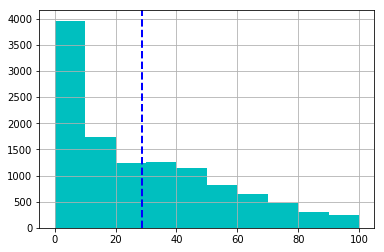

In [442]:
hist_cats['DaysInShelter'].hist(bins=10,color='c')
plt.axvline(hist_cats.DaysInShelter.mean(), color='b', linestyle='dashed', linewidth=2)

In [443]:
adopted_cats['Y']=0
adopted_cats.loc[adopted_cats['DaysInShelter']<29,'Y']=1

In [444]:
adopted_cats['Y'].value_counts()

1    6815
0    5765
Name: Y, dtype: int64

In [445]:
adopted_cats['Neutered'] = adopted_cats['Sex upon Outcome'].str.split().str[0]
adopted_cats['Female'] = adopted_cats['Sex upon Outcome'].str.split().str[1]

In [446]:
#adopted_cats.reset_index()
to_pickle('Data files/clean_dataframe.p',adopted_cats)
adopted_cats=from_pickle('Data files/clean_dataframe.p')

In [447]:
classify_df = pd.get_dummies(adopted_cats, columns=['Intake Type', 'Intake Condition'])

In [448]:
classify_df.head()

,Name,Sex upon Intake,Breed,Color,Outcome Type,Sex upon Outcome,IntakeAge,OutcomeAge,DaysInShelter,adoption_month,...,Intake Type_Public Assist,Intake Type_Stray,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick
18,1,Spayed Female,Domestic Shorthair Mix,Tortie,Adoption,Spayed Female,1096,1100,4,3,...,0,0,0,0,0,1,0,0,0,0
22,1,Neutered Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,370,372,2,3,...,0,0,0,0,0,1,0,0,0,0
23,1,Intact Male,Domestic Shorthair Mix,Blue,Adoption,Neutered Male,365,367,2,3,...,0,0,0,0,0,1,0,0,0,0
26,1,Spayed Female,Domestic Shorthair Mix,Blue,Adoption,Spayed Female,730,736,6,3,...,0,1,0,0,0,1,0,0,0,0
28,1,Intact Female,Domestic Shorthair Mix,Lynx Point/White,Adoption,Spayed Female,365,369,4,3,...,0,0,0,0,0,1,0,0,0,0


In [449]:
classify_df = classify_df.drop(['Sex upon Intake','Breed','Color','Outcome Type','OutcomeAge','DaysInShelter','Sex upon Outcome'],axis=1)
classify_df = classify_df.drop(['tan','gray','lilac','cream'],axis=1)
classify_df.columns

Index([u'Name', u'IntakeAge', u'adoption_month', u'Smoke', u'white', u'black',
       u'blue', u'brown', u'orange', u'mix_color', u'Tabby', u'Calico',
       u'Tortie', u'Point', u'Torbie', u'Domestic_short', u'Domestic_med',
       u'Domestic_long', u'Siamese', u'Y', u'Neutered', u'Female',
       u'Intake Type_Euthanasia Request', u'Intake Type_Owner Surrender',
       u'Intake Type_Public Assist', u'Intake Type_Stray',
       u'Intake Condition_Aged', u'Intake Condition_Feral',
       u'Intake Condition_Injured', u'Intake Condition_Normal',
       u'Intake Condition_Nursing', u'Intake Condition_Other',
       u'Intake Condition_Pregnant', u'Intake Condition_Sick'],
      dtype='object')

In [450]:
print  'Intake Type_Euthanasia Request', classify_df['Intake Type_Euthanasia Request'].sum()
print  'Intake Type_Owner Surrender', classify_df['Intake Type_Owner Surrender'].sum()
print  'Intake Type_Public Assist', classify_df['Intake Type_Public Assist'].sum()
print  'Intake Type_Stray', classify_df['Intake Type_Stray'].sum() ,'\n'

print  'Intake Condition_Aged', classify_df['Intake Condition_Aged'].sum()
print  'Intake Condition_Feral', classify_df['Intake Condition_Feral'].sum()
print  'Intake Condition_Injured', classify_df['Intake Condition_Injured'].sum()
print  'Intake Condition_Normal', classify_df['Intake Condition_Normal'].sum()
print  'Intake Condition_Nursing', classify_df['Intake Condition_Nursing'].sum()
print  'Intake Condition_Other', classify_df['Intake Condition_Other'].sum()
print  'Intake Condition_Pregnant', classify_df['Intake Condition_Pregnant'].sum()
print  'Intake Condition_Sick', classify_df['Intake Condition_Sick'].sum()


Intake Type_Euthanasia Request 9
Intake Type_Owner Surrender 3659
Intake Type_Public Assist 134
Intake Type_Stray 8778 

Intake Condition_Aged 10
Intake Condition_Feral 15
Intake Condition_Injured 379
Intake Condition_Normal 11653
Intake Condition_Nursing 245
Intake Condition_Other 8
Intake Condition_Pregnant 7
Intake Condition_Sick 263


In [451]:
classify_df['Male'] = 0
classify_df.loc[classify_df['Female']=='Male','Male'] = 1

In [452]:
classify_df['neutered'] = 0
classify_df.loc[classify_df['Neutered']=='Spayed','neutered'] = 1
classify_df.loc[classify_df['Neutered']=='Neutered','neutered'] = 1

In [453]:
classify_df.head()

,Name,IntakeAge,adoption_month,Smoke,white,black,blue,brown,orange,mix_color,...,Intake Condition_Aged,Intake Condition_Feral,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Intake Condition_Other,Intake Condition_Pregnant,Intake Condition_Sick,Male,neutered
18,1,1096,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
22,1,370,3,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
23,1,365,3,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,1
26,1,730,3,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
28,1,365,3,0,1,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [454]:
classify_df.columns

Index([u'Name', u'IntakeAge', u'adoption_month', u'Smoke', u'white', u'black',
       u'blue', u'brown', u'orange', u'mix_color', u'Tabby', u'Calico',
       u'Tortie', u'Point', u'Torbie', u'Domestic_short', u'Domestic_med',
       u'Domestic_long', u'Siamese', u'Y', u'Neutered', u'Female',
       u'Intake Type_Euthanasia Request', u'Intake Type_Owner Surrender',
       u'Intake Type_Public Assist', u'Intake Type_Stray',
       u'Intake Condition_Aged', u'Intake Condition_Feral',
       u'Intake Condition_Injured', u'Intake Condition_Normal',
       u'Intake Condition_Nursing', u'Intake Condition_Other',
       u'Intake Condition_Pregnant', u'Intake Condition_Sick', u'Male',
       u'neutered'],
      dtype='object')

In [455]:
classify_df = classify_df.drop(['Neutered','Female','Intake Type_Euthanasia Request','Intake Type_Public Assist'],axis=1)
classify_df = classify_df.drop(['Intake Condition_Aged','Intake Condition_Feral','Intake Condition_Other'],axis=1)
classify_df = classify_df.drop(['Intake Condition_Sick','Intake Condition_Pregnant'],axis=1)

In [456]:
classify_df.head()

,Name,IntakeAge,adoption_month,Smoke,white,black,blue,brown,orange,mix_color,...,Domestic_long,Siamese,Y,Intake Type_Owner Surrender,Intake Type_Stray,Intake Condition_Injured,Intake Condition_Normal,Intake Condition_Nursing,Male,neutered
18,1,1096,3,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,0,1
22,1,370,3,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,1
23,1,365,3,0,0,0,1,0,0,0,...,0,0,1,1,0,0,1,0,1,1
26,1,730,3,0,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,1
28,1,365,3,0,1,1,0,0,0,1,...,0,0,1,1,0,0,1,0,0,1


In [457]:
scale = StandardScaler()
classify_df[['IntakeAge']] = scale.fit_transform(classify_df[['IntakeAge']])

In [458]:
classify_df.shape

(12580, 27)

In [459]:
Y_df = classify_df['Y']
Y_df.shape

(12580,)

In [460]:
X_df = classify_df.drop(['Y'],axis=1)

In [461]:
to_pickle('Data files/predictors.p',X_df)
to_pickle('Data files/target.p',Y_df)
to_pickle('Data files/classification_df.p',classify_df)